# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice, i.e. a total of 5 models are to be trained.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [18]:
import pandas as pd

# Loading the datasets provided
alldata = pd.read_excel('alldata.xlsx')
drdata = pd.read_excel('drdata.xlsx')
drq = pd.read_excel('drq.xlsx')
tv2data = pd.read_excel('tv2data.xlsx')
tv2q = pd.read_excel('tv2q.xlsx')
electeddata = pd.read_excel('electeddata.xlsx')

# Quick overview of the dataset
{
    "alldata": alldata.head(),
    "drdata": drdata.head(),
    "drq": drq.head(),
    "tv2data": tv2data.head(),
    "tv2q": tv2q.head(),
    "electeddata": electeddata.head()
}

{'alldata':    530  531  533  534  535  537  538  540  541  543  ...  9a  9b  10a  10b  \
 0   -1   -2    1   -2    2    1   -2    1    1    2  ...   2   0    1   -2   
 1    2    2   -1   -2   -1   -2    1   -2    2   -2  ...  -2   0   -1    2   
 2    2    1   -2   -2    1   -2    1   -1    1   -1  ...  -1  -2    0    2   
 3    2    1   -2   -1    1    1    1    1    1   -2  ...  -2   2    2    2   
 4    1    1   -2    2   -2    1   -2    1    2   -2  ...  -2   0   -1    0   
 
    11a  11b  12a  12b               storkreds  alder  
 0   -2    1    1    1    Københavns Storkreds     78  
 1    1   -2    0    0          Fyns Storkreds     64  
 2    0   -1    1   -2     Bornholms Storkreds     37  
 3    2   -1    2    0  Nordjyllands Storkreds     28  
 4   -2    0    2   -2    Københavns Storkreds     58  
 
 [5 rows x 53 columns],
 'drdata':    530  531  533  534  535  537  538  540  541  543  ...  552  553  555  556  \
 0   -1   -2    1   -2    2    1   -2    1    1    2  ...   

In [19]:
##Sort by party and age


# Select only the relevant columns
alldata_filtered = alldata[["parti", "alder"]]

# Remove rows with missing values
alldata_filtered = alldata_filtered.dropna()

# Remove ages that are 0
alldata_filtered = alldata_filtered[alldata_filtered['alder'] > 0]

age_summary_by_party = alldata_filtered.groupby('parti')['alder'].describe()

# Display the summary statistics
print(age_summary_by_party)

# Define age bins (you can adjust these as needed)
age_bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
age_labels = ['18-25', '25-35', '35-45', '45-55', '55-65', '65-75', '75-85', '85-100']

# Add a new column to categorize ages into bins
alldata_filtered['age_group'] = pd.cut(alldata_filtered['alder'], bins=age_bins, labels=age_labels, right=False)

# Group by party and age group, and count the number of people in each group
age_grouped_by_party = alldata_filtered.groupby(['parti', 'age_group'], observed=True).size().unstack(fill_value=0)

# Group by party and calculate summary statistics for the 'alder' (age) column
age_summary_by_party = alldata_filtered.groupby('parti')['alder'].describe()


                                             count       mean        std  \
parti                                                                      
Alternativet                                  65.0  47.415385  13.620862   
Danmarksdemokraterne                          37.0  51.216216  10.252737   
Dansk Folkeparti                              49.0  45.530612  12.191360   
Det Konservative Folkeparti                   94.0  44.723404  11.904101   
Enhedslisten                                  71.0  42.225352  15.193229   
Frie Grønne, Danmarks Nye Venstrefløjsparti   26.0  34.807692  10.777826   
Kristendemokraterne                           41.0  50.219512  13.441563   
Liberal Alliance                              68.0  37.970588  13.736291   
Løsgænger                                      3.0  48.000000   9.165151   
Moderaterne                                   42.0  44.261905  13.778845   
Nye Borgerlige                                50.0  48.520000  12.241182   
Radikale Ven

C:\Users\popca\AppData\Local\Temp\ipykernel_27104\1772278167.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='parti', y='alder', data=alldata_filtered, jitter=True, size=5, alpha=0.7, palette=custom_palette)


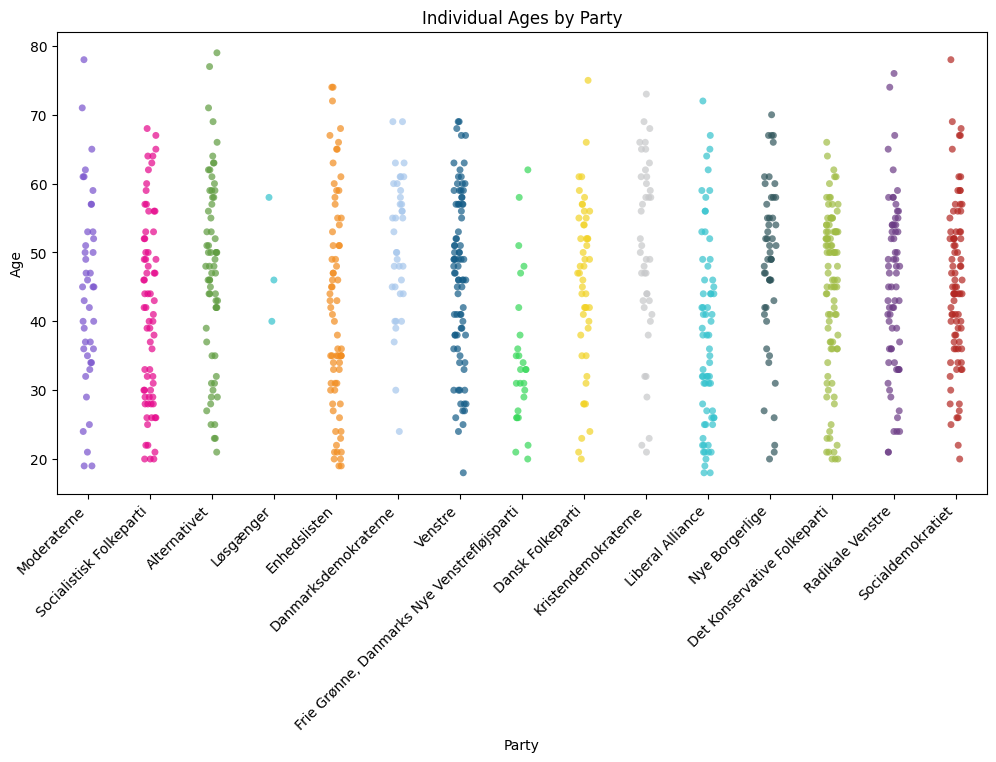

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

color_palette = [
    "#7852CC",  # Moderaterne (M)
    "#E5058A",  # Socialistisk Folkeparti (F)
    "#5E9C3F",  # Alternativet (Å)
    "#34C2CD",  # Løsgænger (Lib. Al. I)
    "#F28C1E",  # Enhedslisten (Ø)
    "#A6C6EC",  # Danmarkdemokraterne (Æ)
    "#125B86",  # Venstre (V)
    "#36D859",  # Frie Grønne (Q)
    "#F2D327",  # Dansk Folkeparti (O)
    "#C7C8CA",  # Kristendemokraterne (K)
    "#34C2CD",  # Liberal Alliance (I)
    "#30565B",  # Nye Borgerlige (D)
    "#A0BC44",  # Det Konservative Folkeparti (C)
    "#6B3B85",  # Radikale Venstre (B)
    "#B32722"   # Socialdemokratiet (A)
]

custom_palette = sns.color_palette(color_palette)

# Plot 1: Strip Plot (Scatter) to visualize individual ages by party with custom colors
plt.figure(figsize=(12, 6))
sns.stripplot(x='parti', y='alder', data=alldata_filtered, jitter=True, size=5, alpha=0.7, palette=custom_palette)

# Customize the plot
plt.title('Individual Ages by Party')
plt.ylabel('Age')
plt.xlabel('Party')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.show()

In [21]:
### Identify the most confident candidate

# +2 and -2 responses
strong_responses = electeddata.iloc[:, :-2]  # Removed storkreds and age columns

# Count of responses per cand
confident_responses = ((strong_responses == 2) | (strong_responses == -2)).sum(axis=1)

# the prop of confident resp
total_responses = strong_responses.shape[1]  # Total number of responses foe cand
confidence_ratio = confident_responses / total_responses

# Adding ratio to original elected data
electeddata['confidence_ratio'] = confidence_ratio

# Sorting cand by confidence 
most_confident_candidates = electeddata[['storkreds', 'alder', 'confidence_ratio']].sort_values(by='confidence_ratio', ascending=False).head(10)


print("Most Confident Candidates:")
print(most_confident_candidates)

Most Confident Candidates:
                   storkreds  alder  confidence_ratio
7      Østjyllands Storkreds     28          0.764706
45    Nordjyllands Storkreds     55          0.745098
1      Østjyllands Storkreds     58          0.725490
66            Fyns Storkreds     31          0.686275
28      Københavns Storkreds     35          0.686275
118      Sjællands Storkreds      0          0.686275
74            Fyns Storkreds     42          0.686275
126      Sjællands Storkreds     59          0.666667
145  Nordsjællands Storkreds     38          0.666667
127      Sjællands Storkreds     32          0.666667


In [22]:
## Classification Models

